In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
df.describe()

id     log_price  accommodates     bathrooms  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263   
std    6.081735e+06      0.717394      2.153589      0.582044   
min    3.440000e+02      0.000000      1.000000      0.000000   
25%    6.261964e+06      4.317488      2.000000      1.000000   
50%    1.225415e+07      4.709530      2.000000      1.000000   
75%    1.640226e+07      5.220356      4.000000      1.000000   
max    2.123090e+07      7.600402     16.000000      8.000000   

       host_response_rate      latitude     longitude  number_of_reviews  \
count        55812.000000  74111.000000  74111.000000       74111.000000   
mean             0.943520     38.445958    -92.397525          20.900568   
std              0.163418      3.080167     21.705322          37.828641   
min              0.000000     33.338905   -122.511500           0.000000   
25%              1.000000     34.127908   -118.342374           1.000000   
50%              1.000000     40.662138    -76.996965           6.000000   
75%              1.000000     40.746096    -73.954660          23.000000   
max              1.000000     42.390437    -70.985047         605.000000   

       review_scores_rating      bedrooms          beds  
count          57389.000000  74020.000000  73980.000000  
mean              94.067365      1.265793      1.710868  
std                7.836556      0.852143      1.254142  
min               20.000000      0.000000      0.000000  
25%               92.000000      1.000000      1.000000  
50%               96.000000      1.000000      1.000000  
75%              100.000000      1.000000      2.000000  
max              100.000000     10.000000     18.000000

#### Removing initial columns

In [5]:
df.drop(['latitude', 'longitude', 'name',  'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1, inplace=True)

In [6]:
df.drop(['description'], axis=1, inplace=True)

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [9]:
df['cleaning_fee'].unique()

array([ True, False])

In [10]:
df['cleaning_fee'].replace({False: 0, True: 1}, inplace=True)

In [11]:
df.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  ... host_has_profile_pic  \
0  Real Bed              strict             1  NYC  ...                    t   
1  Real Bed              strict             1  NYC  ...                    t   
2  Real Bed            moderate             1  NYC  ...                    t   
3  Real Bed            flexible             1   SF  ...                    t   
4  Real Bed            moderate             1   DC  ...                    t   

  host_identity_verified host_response_rate  host_since instant_bookable  \
0                      t                NaN    26-03-12                f   
1                      f                1.0    19-06-17                t   
2                      t                1.0    25-10-16                t   
3                      t                NaN    19-04-15                f   
4                      t                1.0    01-03-15                t   

  last_review number_of_reviews  review_scores_rating  bedrooms  beds  
0    18-07-16                 2                 100.0       1.0   1.0  
1    23-09-17                 6                  93.0       3.0   3.0  
2    14-09-17                10                  92.0       1.0   3.0  
3         NaN                 0                   NaN       2.0   2.0  
4    22-01-17                 4                  40.0       0.0   1.0  

[5 rows x 21 columns]

In [12]:
df.replace({'f': 0, 't': 1}, inplace=True)

In [13]:
df.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  ... host_has_profile_pic  \
0  Real Bed              strict             1  NYC  ...                  1.0   
1  Real Bed              strict             1  NYC  ...                  1.0   
2  Real Bed            moderate             1  NYC  ...                  1.0   
3  Real Bed            flexible             1   SF  ...                  1.0   
4  Real Bed            moderate             1   DC  ...                  1.0   

   host_identity_verified  host_response_rate  host_since instant_bookable  \
0                     1.0                 NaN    26-03-12                0   
1                     0.0                 1.0    19-06-17                1   
2                     1.0                 1.0    25-10-16                1   
3                     1.0                 NaN    19-04-15                0   
4                     1.0                 1.0    01-03-15                1   

   last_review number_of_reviews  review_scores_rating  bedrooms  beds  
0     18-07-16                 2                 100.0       1.0   1.0  
1     23-09-17                 6                  93.0       3.0   3.0  
2     14-09-17                10                  92.0       1.0   3.0  
3          NaN                 0                   NaN       2.0   2.0  
4     22-01-17                 4                  40.0       0.0   1.0  

[5 rows x 21 columns]

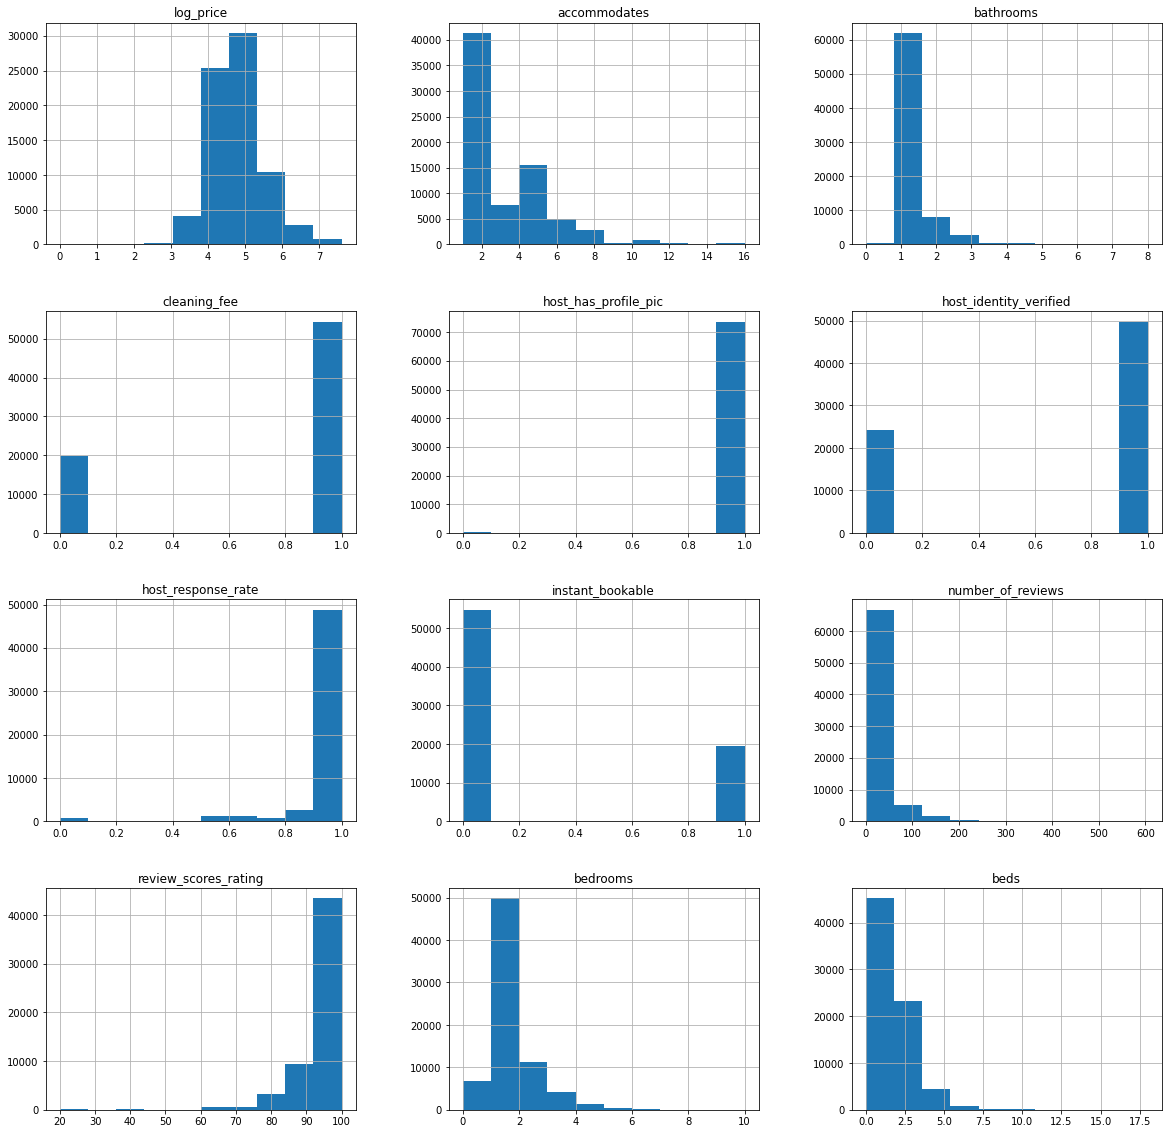

In [14]:
df.hist(figsize=(20,20));

#### host_has_profile_pic has only one category hence it can be dropped

In [15]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [16]:
df.drop(['host_has_profile_pic'], axis=1, inplace = True)

In [17]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [18]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

### Filling missing  values in bathrooms

In [19]:
df['bathrooms'].unique()

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

In [20]:
df['bathrooms'].mode()

0    1.0
dtype: float64

In [21]:
df['bathrooms'].median()

1.0

In [22]:
df["bathrooms"] = df["bathrooms"].fillna(df['bathrooms'].median())

In [23]:
df['bathrooms'].isna().sum()

0

In [24]:
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

### Cleaning date columns: host_since, first_review, last_review

In [25]:
import datetime
import time

In [26]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since)
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [27]:
df['host_days_active'] = (datetime.datetime(2021, 12, 19) - df.host_since).astype('timedelta64[D]')

In [28]:
df['host_days_active'].head()

0    3555.0
1    1644.0
2    1881.0
3    2436.0
4    2542.0
Name: host_days_active, dtype: float64

In [29]:
df['host_days_active'].median()

2637.0

In [30]:
df['host_days_active'].isna().sum()

188

In [31]:
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

In [32]:
df['host_days_active'].isna().sum()

0

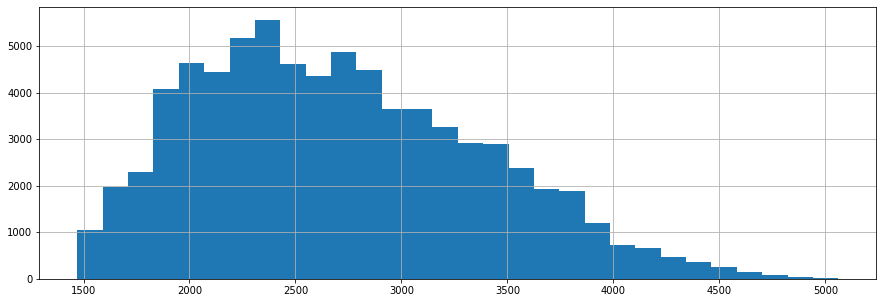

In [33]:
df.host_days_active.hist(figsize=(15,5), bins=30);

In [34]:
df['time_since_first_review'] = (datetime.datetime(2021, 12, 19) - df.first_review).astype('timedelta64[D]')

In [35]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'host_days_active',
       'time_since_first_review'],
      dtype='object')

In [36]:
df['time_since_first_review'].isna().sum()

15864

In [37]:
df['time_since_first_review'].head()

0    2010.0
1    1686.0
2    1694.0
3       NaN
4    2206.0
Name: time_since_first_review, dtype: float64

In [38]:
df.time_since_first_review.isna().sum()

15864

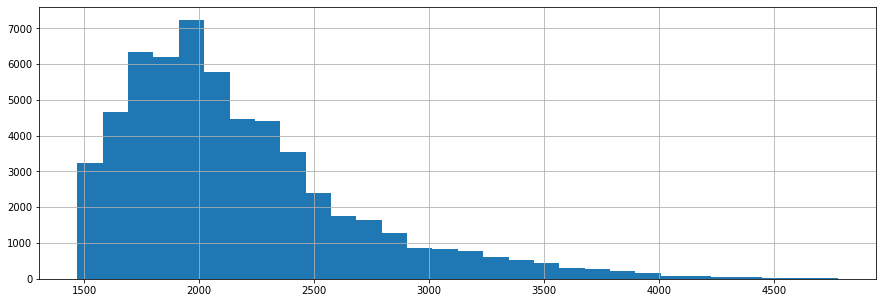

In [39]:
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [40]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [41]:
bin_column('time_since_first_review',
           bins=[0, 1460, 2190, 2920, 3650, max(df.time_since_first_review)],
           labels=['0-4 years',
                   '4-6 years',
                   '6-8 years',
                   '8-10 years',
                   '10+ years'],
           na_label='no reviews')

In [42]:
df['time_since_first_review'].unique()

array(['4-6 years', 'nan', '6-8 years', '8-10 years', '10+ years'],
      dtype=object)

In [43]:
df['time_since_first_review'].isnull().sum()

0

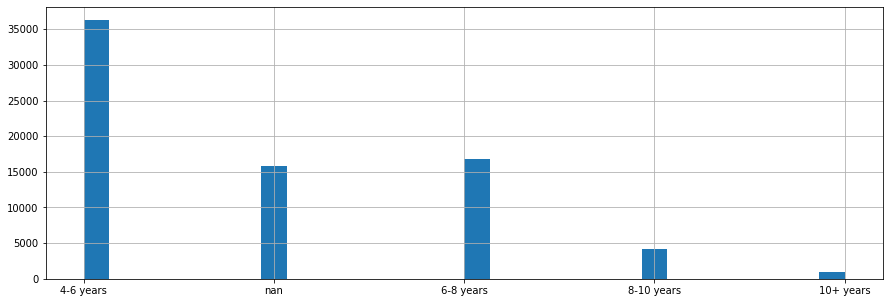

In [44]:
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [45]:
df['time_since_last_review'] = (datetime.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

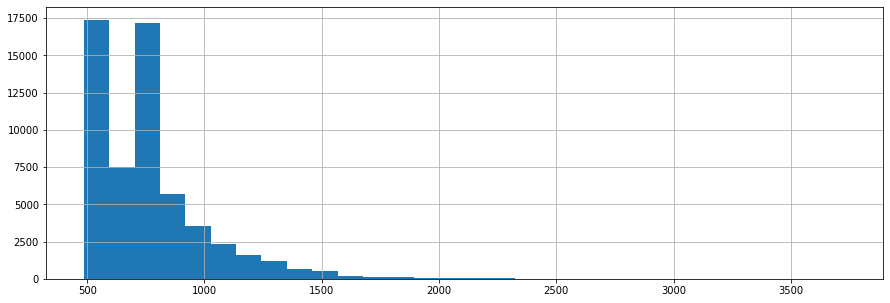

In [46]:
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [47]:
df['time_since_last_review'].isna().sum()

15827

In [48]:
df['time_since_last_review'].head()

0    995.0
1    563.0
2    572.0
3      NaN
4    807.0
Name: time_since_last_review, dtype: float64

In [49]:
bin_column('time_since_last_review',
           bins=[0, 730, 1460, 2190, max(df.time_since_last_review)],
           labels=['0-2 years',
                   '2-4 years',
                   '4-6 years',
                   '6+ years'],
           na_label='no reviews')

In [50]:
df['time_since_last_review'].unique()

array(['2-4 years', '0-2 years', 'nan', '4-6 years', '6+ years'],
      dtype=object)

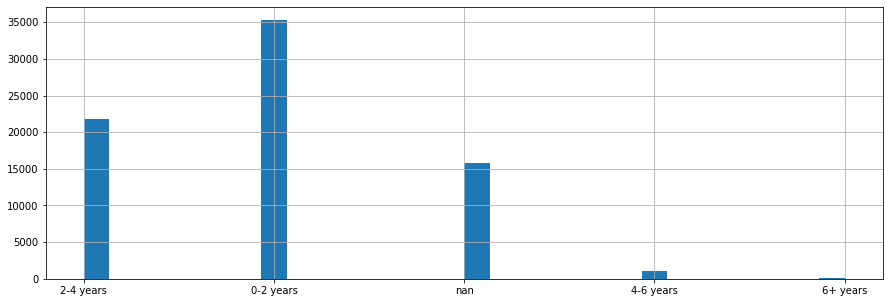

In [51]:
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [52]:
df.drop(['first_review', 'last_review'], axis=1, inplace=True)

In [53]:
df.drop(['host_since'], axis=1, inplace=True)

In [54]:
df.isna().sum()

log_price                      0
property_type                  0
room_type                      0
amenities                      0
accommodates                   0
bathrooms                      0
bed_type                       0
cancellation_policy            0
cleaning_fee                   0
city                           0
host_identity_verified       188
host_response_rate         18299
instant_bookable               0
number_of_reviews              0
review_scores_rating       16722
bedrooms                      91
beds                         131
host_days_active               0
time_since_first_review        0
time_since_last_review         0
dtype: int64

In [55]:
df.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  host_identity_verified  \
0  Real Bed              strict             1  NYC                     1.0   
1  Real Bed              strict             1  NYC                     0.0   
2  Real Bed            moderate             1  NYC                     1.0   
3  Real Bed            flexible             1   SF                     1.0   
4  Real Bed            moderate             1   DC                     1.0   

   host_response_rate  instant_bookable  number_of_reviews  \
0                 NaN                 0                  2   
1                 1.0                 1                  6   
2                 1.0                 1                 10   
3                 NaN                 0                  0   
4                 1.0                 1                  4   

   review_scores_rating  bedrooms  beds  host_days_active  \
0                 100.0       1.0   1.0            3555.0   
1                  93.0       3.0   3.0            1644.0   
2                  92.0       1.0   3.0            1881.0   
3                   NaN       2.0   2.0            2436.0   
4                  40.0       0.0   1.0            2542.0   

  time_since_first_review time_since_last_review  
0               4-6 years              2-4 years  
1               4-6 years              0-2 years  
2               4-6 years              0-2 years  
3                     nan                    nan  
4               6-8 years              2-4 years

### cleaning host_identity_verified

In [56]:
 df['host_identity_verified'].fillna(1.0, inplace=True)

In [57]:
df['host_identity_verified'].mode()

0    1.0
dtype: float64

In [58]:
df['host_identity_verified'].isna().sum()

0

In [59]:
df['host_identity_verified'] = df['host_identity_verified'].astype(int)

In [60]:
df.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  host_identity_verified  \
0  Real Bed              strict             1  NYC                       1   
1  Real Bed              strict             1  NYC                       0   
2  Real Bed            moderate             1  NYC                       1   
3  Real Bed            flexible             1   SF                       1   
4  Real Bed            moderate             1   DC                       1   

   host_response_rate  instant_bookable  number_of_reviews  \
0                 NaN                 0                  2   
1                 1.0                 1                  6   
2                 1.0                 1                 10   
3                 NaN                 0                  0   
4                 1.0                 1                  4   

   review_scores_rating  bedrooms  beds  host_days_active  \
0                 100.0       1.0   1.0            3555.0   
1                  93.0       3.0   3.0            1644.0   
2                  92.0       1.0   3.0            1881.0   
3                   NaN       2.0   2.0            2436.0   
4                  40.0       0.0   1.0            2542.0   

  time_since_first_review time_since_last_review  
0               4-6 years              2-4 years  
1               4-6 years              0-2 years  
2               4-6 years              0-2 years  
3                     nan                    nan  
4               6-8 years              2-4 years

### cleaning host_response_rate

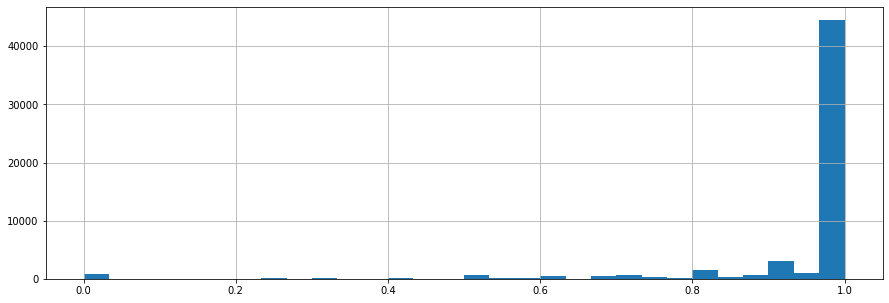

In [61]:
df.host_response_rate.hist(figsize=(15,5), bins=30);

In [62]:
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 0.5, 0.9, 0.99, 1], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       43254
unknown    18299
50-89%      7291
90-99%      3192
0-49%       2075
Name: host_response_rate, dtype: int64

In [63]:
df['host_response_rate'].unique()

array(['unknown', '100%', '50-89%', '0-49%', '90-99%'], dtype=object)

In [64]:
df['host_response_rate'].isna().sum()

0

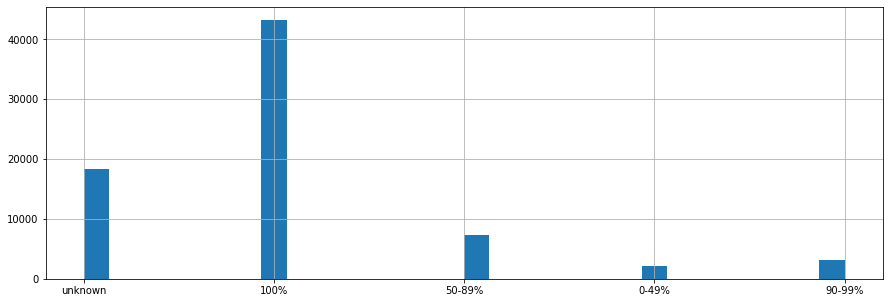

In [65]:
df.host_response_rate.hist(figsize=(15,5), bins=30);

In [66]:
df.isna().sum()

log_price                      0
property_type                  0
room_type                      0
amenities                      0
accommodates                   0
bathrooms                      0
bed_type                       0
cancellation_policy            0
cleaning_fee                   0
city                           0
host_identity_verified         0
host_response_rate             0
instant_bookable               0
number_of_reviews              0
review_scores_rating       16722
bedrooms                      91
beds                         131
host_days_active               0
time_since_first_review        0
time_since_last_review         0
dtype: int64

### cleaning review_scores_rating

In [67]:
df['review_scores_rating'].head()

0    100.0
1     93.0
2     92.0
3      NaN
4     40.0
Name: review_scores_rating, dtype: float64

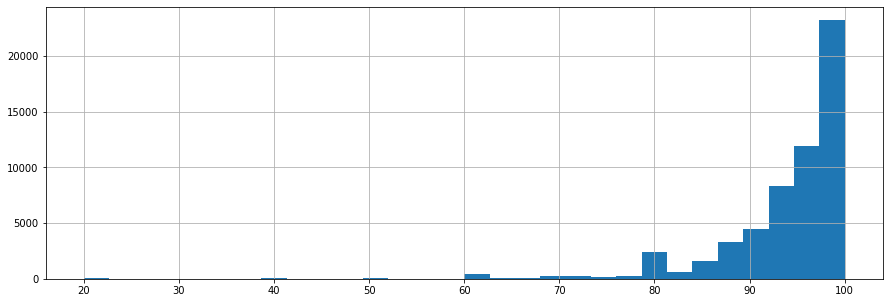

In [68]:
df.review_scores_rating.hist(figsize=(15,5), bins=30);

In [69]:
df.review_scores_rating = pd.cut(df.review_scores_rating, bins=[0, 60.0, 80.0, 90.0, 99.0, 100], labels=['0-60%', '60-80%', '80-90%','90-99%', '100%'], include_lowest=True)

# Converting to string
df.review_scores_rating = df.review_scores_rating.astype('str')

# Replace nulls with 'unknown'
df.review_scores_rating.replace('nan', 'unknown', inplace=True)

# Category counts
df.review_scores_rating.value_counts()

90-99%     28830
unknown    16722
100%       16215
80-90%      8462
60-80%      3189
0-60%        693
Name: review_scores_rating, dtype: int64

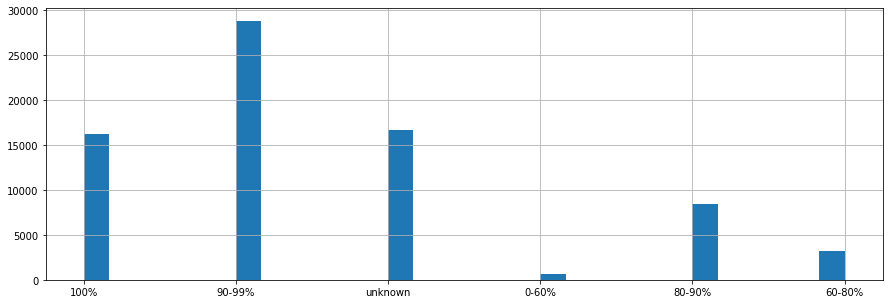

In [70]:
df.review_scores_rating.hist(figsize=(15,5), bins=30);

### cleaning bedrooms

In [71]:
df['bedrooms'].unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

<AxesSubplot:xlabel='beds', ylabel='bedrooms'>

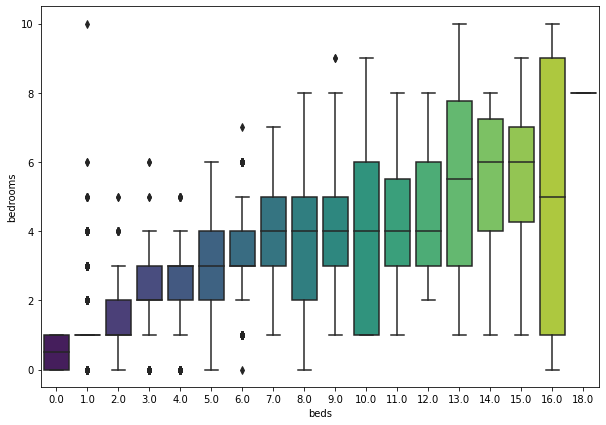

In [72]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='beds',y='bedrooms',data=df,palette='viridis')

In [73]:
def impute_bedrooms(cols):
    bedrooms = cols[0]
    accommodates = cols[1]
    
    if pd.isnull(bedrooms):

        if accommodates in range(1, 4):
            return 1
        elif accommodates in range(4, 6):
            return 2
        elif accommodates in range(6, 9):
            return 3
        elif accommodates in range(9, 17):
            return 4
    else:
        return bedrooms

In [74]:
df['bedrooms'] = df[['bedrooms','accommodates']].apply(impute_bedrooms,axis=1)

In [75]:
df.isna().sum()

log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_identity_verified       0
host_response_rate           0
instant_bookable             0
number_of_reviews            0
review_scores_rating         0
bedrooms                     0
beds                       131
host_days_active             0
time_since_first_review      0
time_since_last_review       0
dtype: int64

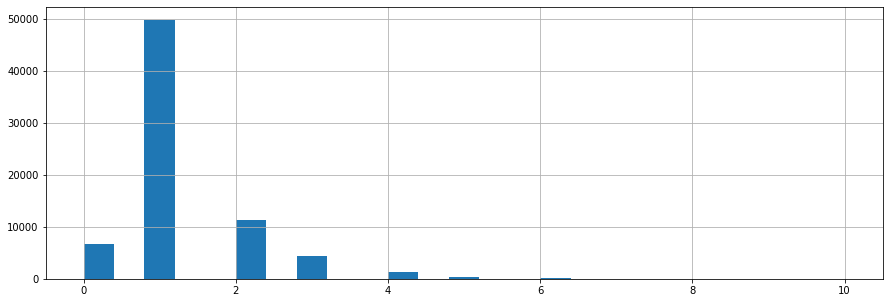

In [76]:
df.bedrooms.hist(figsize=(15,5), bins=25);

### cleaning beds

In [77]:
df['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

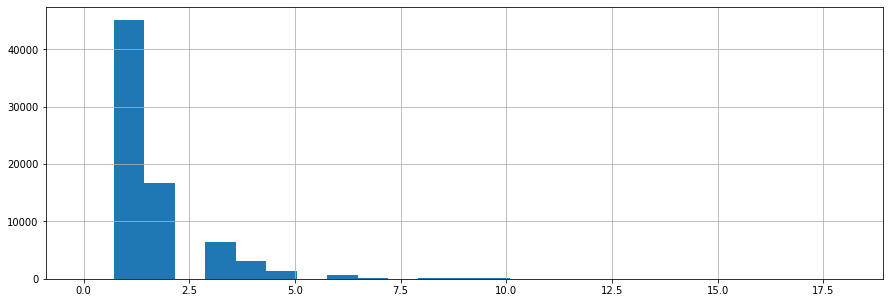

In [78]:
df.beds.hist(figsize=(15,5), bins=25);

<AxesSubplot:xlabel='accommodates', ylabel='beds'>

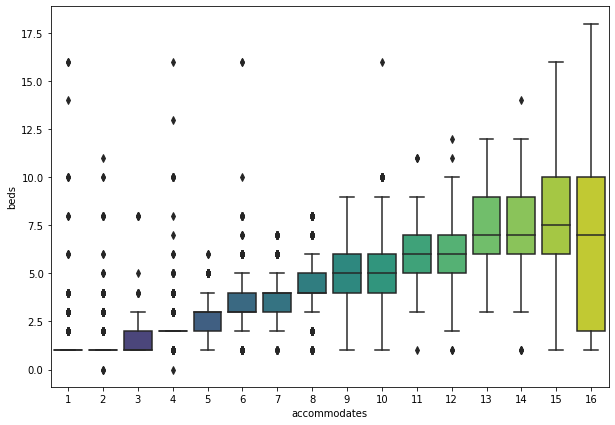

In [79]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='accommodates',y='beds',data=df,palette='viridis')

In [80]:
def impute_beds(cols):
    beds = cols[0]
    accommodates = cols[1]
    
    if pd.isnull(beds):

        if accommodates in range(1, 4):
            return 1
        elif accommodates in range(4, 6):
            return 2
        elif accommodates in range(6, 8):
            return 3
        elif accommodates == 8:
            return 4
        elif accommodates in range(9, 11):
            return 5
        elif accommodates in range(11, 13):
            return 6
        elif accommodates in range(13, 17):
            return 7
    else:
        return beds

In [81]:
df['beds'] = df[['beds','accommodates']].apply(impute_beds,axis=1)

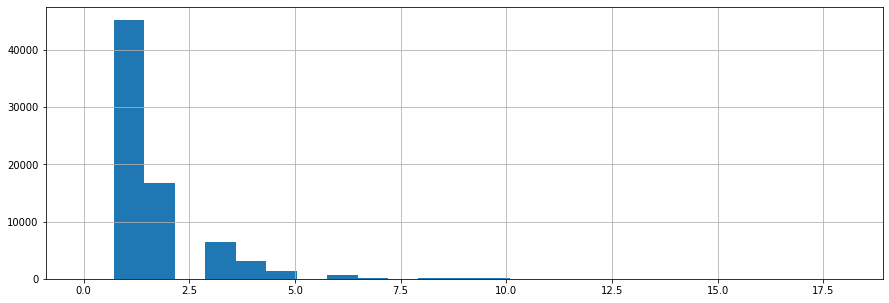

In [82]:
df.beds.hist(figsize=(15,5), bins=25);

In [83]:
df.isna().sum()

log_price                  0
property_type              0
room_type                  0
amenities                  0
accommodates               0
bathrooms                  0
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_identity_verified     0
host_response_rate         0
instant_bookable           0
number_of_reviews          0
review_scores_rating       0
bedrooms                   0
beds                       0
host_days_active           0
time_since_first_review    0
time_since_last_review     0
dtype: int64

In [84]:
len(df.columns)

20

In [85]:
df.head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  host_identity_verified  \
0  Real Bed              strict             1  NYC                       1   
1  Real Bed              strict             1  NYC                       0   
2  Real Bed            moderate             1  NYC                       1   
3  Real Bed            flexible             1   SF                       1   
4  Real Bed            moderate             1   DC                       1   

  host_response_rate  instant_bookable  number_of_reviews  \
0            unknown                 0                  2   
1               100%                 1                  6   
2               100%                 1                 10   
3            unknown                 0                  0   
4               100%                 1                  4   

  review_scores_rating  bedrooms  beds  host_days_active  \
0                 100%       1.0   1.0            3555.0   
1               90-99%       3.0   3.0            1644.0   
2               90-99%       1.0   3.0            1881.0   
3              unknown       2.0   2.0            2436.0   
4                0-60%       0.0   1.0            2542.0   

  time_since_first_review time_since_last_review  
0               4-6 years              2-4 years  
1               4-6 years              0-2 years  
2               4-6 years              0-2 years  
3                     nan                    nan  
4               6-8 years              2-4 years

In [91]:
df.amenities[3:5].values

array(['{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}',
       '{TV,Internet,"Wireless Internet","Air conditioning",Kitchen,"Elevator in building",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo}'],
      dtype=object)

In [92]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to fro

In [94]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review',
       'time_since_last_review'],
      dtype='object')

In [95]:
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1

In [98]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\HP\AppData\Local\Temp/ipykernel_5164/4138584413.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [100]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review', 'time_since_last_review',
       'air_conditioning', 'check_in_24h', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'],
      dtype='object')

In [101]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,20:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

### take a look at the new columns formed

In [112]:
df.iloc[:,:20].head()

log_price property_type        room_type  \
0   5.010635     Apartment  Entire home/apt   
1   5.129899     Apartment  Entire home/apt   
2   4.976734     Apartment  Entire home/apt   
3   6.620073         House  Entire home/apt   
4   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  host_identity_verified  \
0  Real Bed              strict             1  NYC                       1   
1  Real Bed              strict             1  NYC                       0   
2  Real Bed            moderate             1  NYC                       1   
3  Real Bed            flexible             1   SF                       1   
4  Real Bed            moderate             1   DC                       1   

  host_response_rate  instant_bookable  number_of_reviews  \
0            unknown                 0                  2   
1               100%                 1                  6   
2               100%                 1                 10   
3            unknown                 0                  0   
4               100%                 1                  4   

  review_scores_rating  bedrooms  beds  host_days_active  \
0                 100%       1.0   1.0            3555.0   
1               90-99%       3.0   3.0            1644.0   
2               90-99%       1.0   3.0            1881.0   
3              unknown       2.0   2.0            2436.0   
4                0-60%       0.0   1.0            2542.0   

  time_since_first_review time_since_last_review  
0               4-6 years              2-4 years  
1               4-6 years              0-2 years  
2               4-6 years              0-2 years  
3                     nan                    nan  
4               6-8 years              2-4 years

In [113]:
df.iloc[:,20:40].head()

air_conditioning  check_in_24h  high_end_electronics  bbq  balcony  \
0               1.0           0.0                   0.0  0.0      0.0   
1               1.0           0.0                   0.0  0.0      0.0   
2               1.0           0.0                   0.0  0.0      0.0   
3               0.0           0.0                   0.0  0.0      0.0   
4               1.0           0.0                   0.0  0.0      0.0   

   nature_and_views  bed_linen  breakfast   tv  coffee_machine  \
0               0.0        0.0        0.0  0.0             0.0   
1               0.0        0.0        0.0  0.0             0.0   
2               0.0        0.0        1.0  1.0             0.0   
3               0.0        0.0        0.0  1.0             0.0   
4               0.0        0.0        0.0  1.0             0.0   

   cooking_basics  white_goods  elevator  gym  child_friendly  parking  \
0             0.0          0.0       0.0  0.0             1.0      0.0   
1             0.0          1.0       0.0  0.0             1.0      0.0   
2             0.0          0.0       0.0  0.0             1.0      0.0   
3             0.0          1.0       0.0  0.0             0.0      0.0   
4             0.0          0.0       1.0  0.0             0.0      0.0   

   outdoor_space  host_greeting  hot_tub_sauna_or_pool  internet  
0            0.0            0.0                    0.0       1.0  
1            0.0            0.0                    0.0       1.0  
2            0.0            0.0                    0.0       1.0  
3            0.0            0.0                    0.0       1.0  
4            0.0            0.0                    0.0       1.0

In [114]:
df.iloc[:,40:].head()

long_term_stays  pets_allowed  private_entrance  secure  self_check_in  \
0              0.0           0.0               0.0     0.0            0.0   
1              0.0           0.0               0.0     0.0            0.0   
2              0.0           0.0               0.0     0.0            0.0   
3              0.0           0.0               0.0     0.0            0.0   
4              0.0           0.0               0.0     0.0            0.0   

   smoking_allowed  accessible  event_suitable  
0              0.0         0.0             0.0  
1              0.0         0.0             0.0  
2              0.0         0.0             0.0  
3              0.0         0.0             0.0  
4              0.0         0.0             0.0

In [125]:
# drop amenities column
df.drop(['amenities'], axis=1, inplace=True)

In [126]:
df.isna().sum()

log_price                  0
property_type              0
room_type                  0
accommodates               0
bathrooms                  0
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_identity_verified     0
host_response_rate         0
instant_bookable           0
number_of_reviews          0
review_scores_rating       0
bedrooms                   0
beds                       0
host_days_active           0
time_since_first_review    0
time_since_last_review     0
air_conditioning           0
check_in_24h               0
high_end_electronics       0
bbq                        0
balcony                    0
nature_and_views           0
bed_linen                  0
breakfast                  0
tv                         0
coffee_machine             0
cooking_basics             0
white_goods                0
elevator                   0
gym                        0
child_friendly             0
parking       

In [127]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'host_days_active', 'time_since_first_review', 'time_since_last_review',
       'air_conditioning', 'check_in_24h', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed',
       'private_entrance', 'secure', 'self_check_in', 'smoking_allowed',
       'accessible', 'event_suitable'],
      dtype='object')

In [128]:
df.shape

(74111, 47)

In [131]:
transformed_df = pd.get_dummies(df, columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_response_rate', 'review_scores_rating', 'time_since_first_review', 'time_since_last_review'])

In [135]:
for i in transformed_df.columns:
    print(i)

log_price
accommodates
bathrooms
cleaning_fee
host_identity_verified
instant_bookable
number_of_reviews
bedrooms
beds
host_days_active
air_conditioning
check_in_24h
high_end_electronics
bbq
balcony
nature_and_views
bed_linen
breakfast
tv
coffee_machine
cooking_basics
white_goods
elevator
gym
child_friendly
parking
outdoor_space
host_greeting
hot_tub_sauna_or_pool
internet
long_term_stays
pets_allowed
private_entrance
secure
self_check_in
smoking_allowed
accessible
event_suitable
property_type_Apartment
property_type_Bed & Breakfast
property_type_Boat
property_type_Boutique hotel
property_type_Bungalow
property_type_Cabin
property_type_Camper/RV
property_type_Casa particular
property_type_Castle
property_type_Cave
property_type_Chalet
property_type_Condominium
property_type_Dorm
property_type_Earth House
property_type_Guest suite
property_type_Guesthouse
property_type_Hostel
property_type_House
property_type_Hut
property_type_In-law
property_type_Island
property_type_Lighthouse
property

In [137]:
transformed_df.shape

(74111, 113)

In [138]:
transformed_df.corr()

log_price  accommodates  bathrooms  \
log_price                          1.000000      0.567574   0.355174   
accommodates                       0.567574      1.000000   0.505490   
bathrooms                          0.355174      0.505490   1.000000   
cleaning_fee                       0.111191      0.182306   0.054134   
host_identity_verified             0.024014      0.057689   0.014288   
...                                     ...           ...        ...   
time_since_last_review_0-2 years  -0.038958      0.065514  -0.037594   
time_since_last_review_2-4 years  -0.044357     -0.021994   0.013662   
time_since_last_review_4-6 years   0.019907     -0.016074   0.000676   
time_since_last_review_6+ years    0.011078     -0.005383  -0.000837   
time_since_last_review_nan         0.090037     -0.050230   0.030499   

                                  cleaning_fee  host_identity_verified  \
log_price                             0.111191                0.024014   
accommodates                          0.182306                0.057689   
bathrooms                             0.054134                0.014288   
cleaning_fee                          1.000000                0.162285   
host_identity_verified                0.162285                1.000000   
...                                        ...                     ...   
time_since_last_review_0-2 years      0.184913                0.090943   
time_since_last_review_2-4 years      0.022774                0.087623   
time_since_last_review_4-6 years     -0.013027                0.023548   
time_since_last_review_6+ years      -0.002336               -0.000009   
time_since_last_review_nan           -0.246678               -0.215129   

                                  instant_bookable  number_of_reviews  \
log_price                                -0.044271          -0.032470   
accommodates                              0.053093           0.041964   
bathrooms                                 0.001912          -0.041521   
cleaning_fee                              0.010031           0.110204   
host_identity_verified                   -0.087729           0.161881   
...                                            ...                ...   
time_since_last_review_0-2 years          0.142486           0.339621   
time_since_last_review_2-4 years         -0.118456          -0.099105   
time_since_last_review_4-6 years         -0.060454          -0.050066   
time_since_last_review_6+ years          -0.018800          -0.013733   
time_since_last_review_nan               -0.022669          -0.287903   

                                  bedrooms      beds  host_days_active  ...  \
log_price                         0.473143  0.442137          0.077120  ...   
accommodates                      0.709281  0.810983         -0.008391  ...   
bathrooms                         0.589629  0.525433         -0.006140  ...   
cleaning_fee                      0.105383  0.131972          0.090557  ...   
host_identity_verified            0.025643  0.035790          0.329328  ...   
...                                    ...       ...               ...  ...   
time_since_last_review_0-2 years -0.007500  0.054969         -0.001849  ...   
time_since_last_review_2-4 years -0.003530 -0.021987          0.080795  ...   
time_since_last_review_4-6 years  0.004802 -0.011814          0.084714  ...   
time_since_last_review_6+ years   0.001665 -0.007955          0.059775  ...   
time_since_last_review_nan        0.011521 -0.038404         -0.117491  ...   

                                  time_since_first_review_10+ years  \
log_price                                                  0.005520   
accommodates                                              -0.004926   
bathrooms                                                 -0.015201   
cleaning_fee                                               0.005187   
host_identity_verified                                     0.034387   
...                         

In [139]:
cor = transformed_df.corr()

<AxesSubplot:>

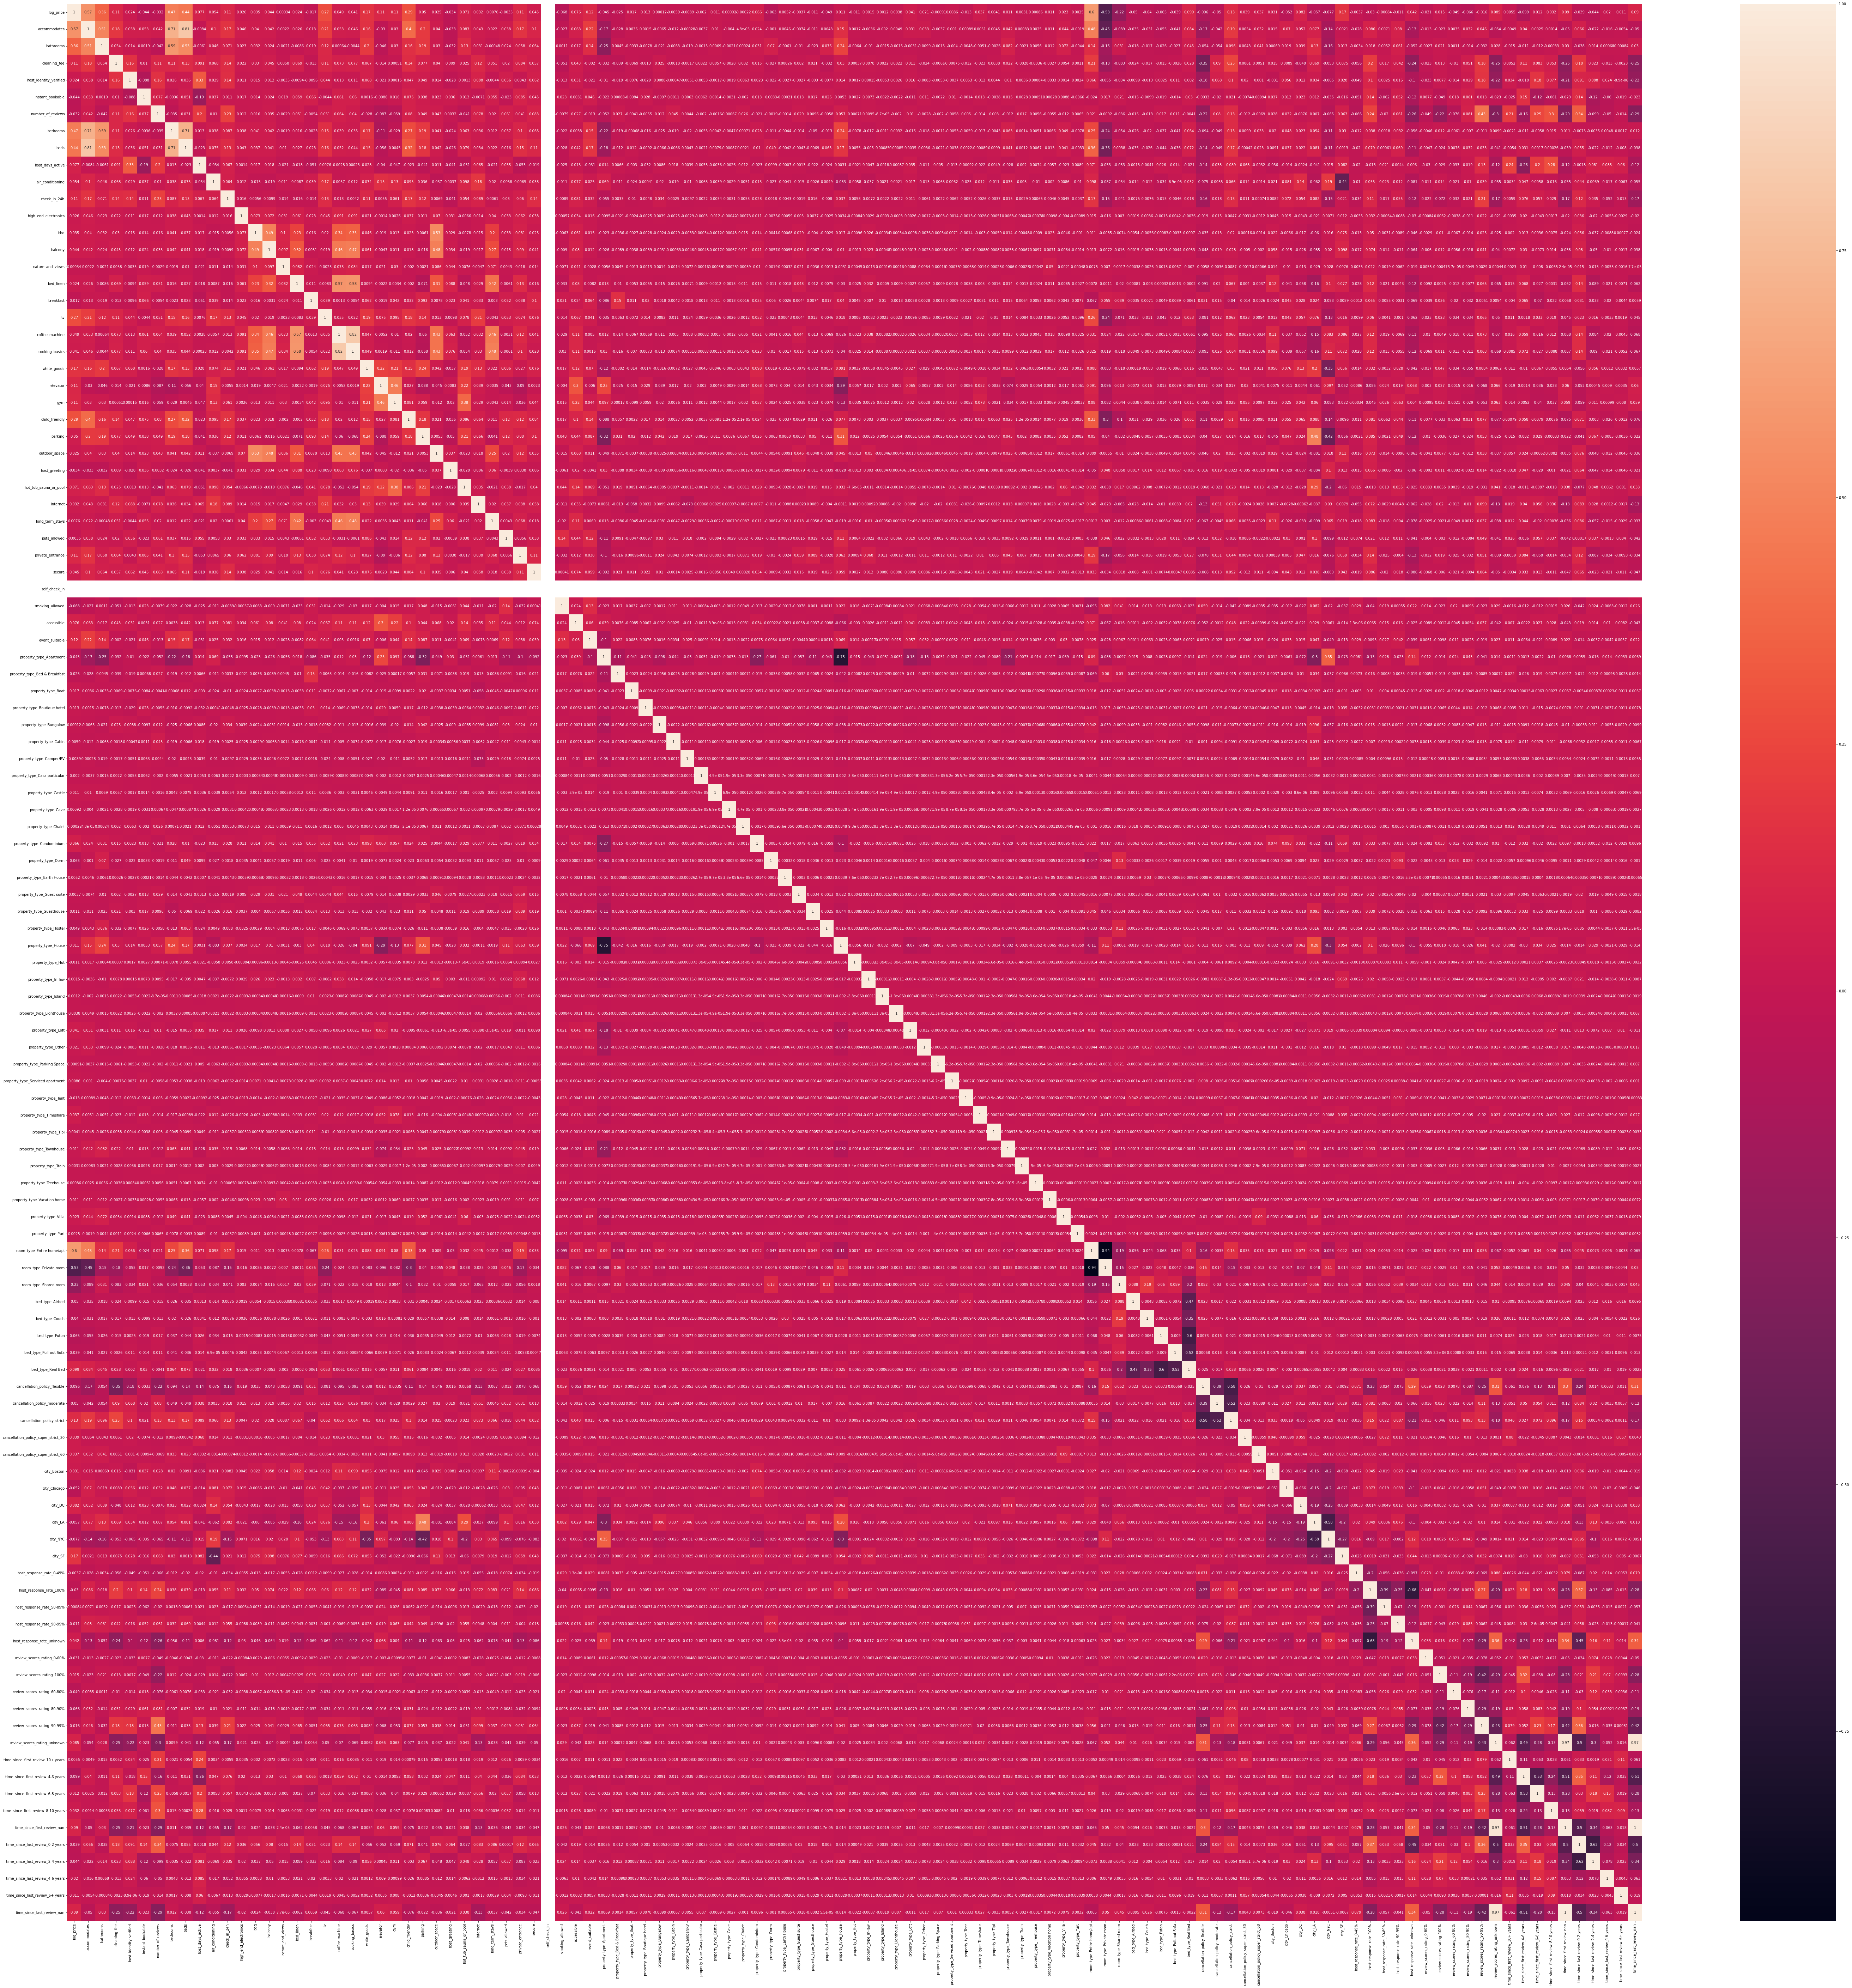

In [145]:
plt.figure(figsize=(100,100))
sns.heatmap(cor,annot=True)

In [154]:
for col in transformed_df.columns:
    print(col, " : ", transformed_df['log_price'].corr(transformed_df[col]))

log_price  :  1.0
accommodates  :  0.5675742149786184
bathrooms  :  0.35517427197005147
cleaning_fee  :  0.111190513943494
host_identity_verified  :  0.024014183871877762
instant_bookable  :  -0.044271280444865675
number_of_reviews  :  -0.032469976188866254
bedrooms  :  0.4731432497574289
beds  :  0.4421368929173019
host_days_active  :  0.07711950180900062
air_conditioning  :  0.05382413990422348
check_in_24h  :  0.11039239887776274
high_end_electronics  :  0.026137628708080098
bbq  :  0.03499757114107992
balcony  :  0.0436381199004376
nature_and_views  :  0.0003405682025449241
bed_linen  :  0.024412426855256814
breakfast  :  -0.016584645328779537
tv  :  0.27276999358257087
coffee_machine  :  0.049105917217389994
cooking_basics  :  0.04140972207195487
white_goods  :  0.1679174542096014
elevator  :  0.11025365582135853
gym  :  0.11262446353943821
child_friendly  :  0.29061122878423457
parking  :  0.050479735733335425
outdoor_space  :  0.024701573015654944
host_greeting  :  -0.0339574206

In [160]:
for col in transformed_df.columns:
    if (transformed_df['log_price'].corr(transformed_df[col])) < -0.3 or (transformed_df['log_price'].corr(transformed_df[col]) >0.3):
        print(col)

log_price
accommodates
bathrooms
bedrooms
beds
room_type_Entire home/apt
room_type_Private room


In [164]:
# to check multi collinearity
for col1 in transformed_df.columns:
    for col2 in transformed_df.columns:
        if (transformed_df[col1].corr(transformed_df[col2]) < -0.2) or (transformed_df[col1].corr(transformed_df[col2]) > 0.2):
            print(col1, ", ", col2)

log_price ,  log_price
log_price ,  accommodates
log_price ,  bathrooms
log_price ,  bedrooms
log_price ,  beds
log_price ,  tv
log_price ,  child_friendly
log_price ,  room_type_Entire home/apt
log_price ,  room_type_Private room
log_price ,  room_type_Shared room
accommodates ,  log_price
accommodates ,  accommodates
accommodates ,  bathrooms
accommodates ,  bedrooms
accommodates ,  beds
accommodates ,  tv
accommodates ,  child_friendly
accommodates ,  event_suitable
accommodates ,  room_type_Entire home/apt
accommodates ,  room_type_Private room
bathrooms ,  log_price
bathrooms ,  accommodates
bathrooms ,  bathrooms
bathrooms ,  bedrooms
bathrooms ,  beds
bathrooms ,  property_type_Apartment
bathrooms ,  property_type_House
cleaning_fee ,  cleaning_fee
cleaning_fee ,  room_type_Entire home/apt
cleaning_fee ,  cancellation_policy_flexible
cleaning_fee ,  cancellation_policy_strict
cleaning_fee ,  host_response_rate_100%
cleaning_fee ,  host_response_rate_unknown
cleaning_fee ,  revie

property_type_Vacation home ,  property_type_Vacation home
property_type_Villa ,  property_type_Villa
property_type_Yurt ,  property_type_Yurt
room_type_Entire home/apt ,  log_price
room_type_Entire home/apt ,  accommodates
room_type_Entire home/apt ,  cleaning_fee
room_type_Entire home/apt ,  bedrooms
room_type_Entire home/apt ,  beds
room_type_Entire home/apt ,  tv
room_type_Entire home/apt ,  child_friendly
room_type_Entire home/apt ,  room_type_Entire home/apt
room_type_Entire home/apt ,  room_type_Private room
room_type_Private room ,  log_price
room_type_Private room ,  accommodates
room_type_Private room ,  bedrooms
room_type_Private room ,  beds
room_type_Private room ,  tv
room_type_Private room ,  child_friendly
room_type_Private room ,  room_type_Entire home/apt
room_type_Private room ,  room_type_Private room
room_type_Shared room ,  log_price
room_type_Shared room ,  room_type_Shared room
bed_type_Airbed ,  bed_type_Airbed
bed_type_Airbed ,  bed_type_Real Bed
bed_type_Couc

time_since_first_review_6-8 years ,  review_scores_rating_90-99%
time_since_first_review_6-8 years ,  review_scores_rating_unknown
time_since_first_review_6-8 years ,  time_since_first_review_4-6 years
time_since_first_review_6-8 years ,  time_since_first_review_6-8 years
time_since_first_review_6-8 years ,  time_since_first_review_nan
time_since_first_review_6-8 years ,  time_since_last_review_nan
time_since_first_review_8-10 years ,  number_of_reviews
time_since_first_review_8-10 years ,  host_days_active
time_since_first_review_8-10 years ,  time_since_first_review_4-6 years
time_since_first_review_8-10 years ,  time_since_first_review_8-10 years
time_since_first_review_nan ,  cleaning_fee
time_since_first_review_nan ,  host_identity_verified
time_since_first_review_nan ,  number_of_reviews
time_since_first_review_nan ,  cancellation_policy_flexible
time_since_first_review_nan ,  host_response_rate_100%
time_since_first_review_nan ,  host_response_rate_unknown
time_since_first_revie

In [165]:
transformed_df.to_csv("cleanedData.csv", index = False)